<a href="https://colab.research.google.com/github/jhportfolio1/MsAiSchool07_DeepLearning/blob/main/DL07_Keras(%EC%A3%BC%ED%83%9D%EA%B0%80%EA%B2%A9%EC%98%88%EC%B8%A1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 보스턴 주택 가격 데이터셋

- 1970년 중반 보스턴 외곽 지역 범죄율, 지방세율 데이터 주어지면, 주택 가격 중간값 예측하는 데이터
- 훈련샘플 404개, 테스트샘플 102개 (총 506개)
- 스케일 차이가 많이 남

# 2. 실습

>## 1) 데이터 가져오기

In [23]:
from keras.datasets import boston_housing
(train_data, train_labels),(test_data, test_labels) = boston_housing.load_data()

>## 2) 데이터 확인

In [24]:
print(train_data.shape) #훈련데이터 확인 
print(test_data.shape)  #테스트데이터 확인

print(train_labels[0])  #라벨데이터 일부 확인

(404, 13)
(102, 13)
15.2


- 훈련용 데이터 확인해보면, 값이 널뛰고 있어 스케일링  필요!

In [25]:
print(train_data[0])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]


>## 3) 데이터 전처리 : 스케일링(Scaling)

In [26]:
#각 컬럼(축)별 평균치
mean = train_data.mean(axis=0)

#각 컬럼별 모든 값에서 컬럼별 평균을 빼줌
train_data -= mean 

#각 컬럼별 표준편차 구함
std = train_data.std(axis=0)

#모든 데이터를 표준편차로 나누기
train_data /= std

train_data[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

>## 4) 모델(신경망) 구성 및 가중치 부여

In [35]:
from keras import models
from keras import layers

def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
  model.add(layers.Dense(64, activation='relu'))
  model.add(layers.Dense(1))  #집값 1개의 결과만 보면됨 / Regression은 결과값에 Activation 지정 안해도 됨 

  #가중치부여
  model.compile(optimizer='rmsprop',
                loss='mse',
                metrics=['mse'])
  return model

>## 5) K-Folder 검증을 사용한 훈련 검증 및 모델 학습/검증까지
- 데이터 양이 적어서 K겹 검증 사용

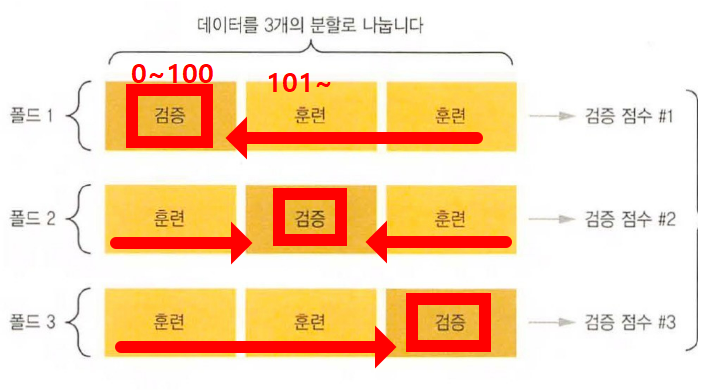

In [39]:
import numpy as np 

k = 4                                       # folder 개수
num_val_samples = len(train_data) // k      # 한 folder의 데이터 수 
all_scores = []


for i in range(k):
  print('처리중인 폴드 #', i)

  #검증데이터 준비
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_labels = train_labels[i * num_val_samples: (i + 1) * num_val_samples]


  #학습데이터 준비
  data1 = train_data[:i * num_val_samples]
  data2 = train_data[(i+1) * num_val_samples :]

  data1_labels = train_labels[:i * num_val_samples]
  data2_labels = train_labels[(i+1) * num_val_samples :]

  partial_train_data = np.concatenate([data1, data2], axis=0)
  partial_train_labels = np.concatenate([data1_labels, data2_labels], axis=0) #concatenate : 똑같은 구조의 데이터를 합쳐줌

  # 모델의 학습
  model = build_model()
  model.fit(partial_train_data, partial_train_labels, epochs=100, batch_size=128, verbose=0)

  # 모델의 검증
  val_mse, val_mae = model.evaluate(val_data, val_labels)
  print(val_mse, val_mae)
  all_scores.append(val_mae)


처리중인 폴드 # 0
4/4 [==============================] - 0s 7ms/step - loss: 8.8624 - mse: 8.8624
8.86242389678955 8.86242389678955
처리중인 폴드 # 1
4/4 [==============================] - 0s 4ms/step - loss: 12.2969 - mse: 12.2969
12.296869277954102 12.296869277954102
처리중인 폴드 # 2
4/4 [==============================] - 0s 6ms/step - loss: 14.9631 - mse: 14.9631
14.96310806274414 14.96310806274414
처리중인 폴드 # 3
4/4 [==============================] - 0s 4ms/step - loss: 13.0553 - mse: 13.0553
13.055293083190918 13.055293083190918


>## 6) 결과의 평균 및 요약

In [40]:
#모든 모델 결과의 평균값 구하기

np.mean(all_scores)

12.294423580169678

In [43]:
import numpy as np 

k = 4                                       # folder 개수
num_val_samples = len(train_data) // k      # 한 folder의 데이터 수 
all_scores = []


for i in range(k):
  print('처리중인 폴드 #', i)

  #검증데이터 준비
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_labels = train_labels[i * num_val_samples: (i + 1) * num_val_samples]


  #학습데이터 준비
  data1 = train_data[:i * num_val_samples]
  data2 = train_data[(i+1) * num_val_samples :]

  data1_labels = train_labels[:i * num_val_samples]
  data2_labels = train_labels[(i+1) * num_val_samples :]

  partial_train_data = np.concatenate([data1, data2], axis=0)
  partial_train_labels = np.concatenate([data1_labels, data2_labels], axis=0) #concatenate : 똑같은 구조의 데이터를 합쳐줌

  # 모델의 학습
  model = build_model()

  # 모델 요약
  model.summary()

  # 모델 적용
  model.fit(partial_train_data, partial_train_labels, epochs=100, batch_size=128, verbose=0)

  # 모델의 검증
  val_mse, val_mae = model.evaluate(val_data, val_labels)
  print(val_mse, val_mae)
  all_scores.append(val_mae)

처리중인 폴드 # 0
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 64)                896       
                                                                 
 dense_43 (Dense)            (None, 64)                4160      
                                                                 
 dense_44 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
4/4 [==============================] - 0s 4ms/step - loss: 9.3706 - mse: 9.3706
9.370561599731445 9.370561599731445
처리중인 폴드 # 1
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)   